In [264]:
# Load the necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore

In [265]:
# read into pandas dataframe
mydata = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [266]:
# Check first 5 records
mydata.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [267]:
# shape
print(mydata.shape)

(5000, 14)


**There are 5000 Rows and 14 Columns.**

In [268]:
mydata.info() # To see the data type of each of the variable, number of values entered in each of the variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [269]:
# Check null values
mydata.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

**No null values as NaN**

In [270]:
# Making a list of additional missing value types
missing_values = ["n/a", "na", "--",".","?","??"]
mydata = pd.read_csv("Bank_Personal_Loan_Modelling.csv", na_values = missing_values)
# Total missing values for each feature
print (mydata.isnull().sum())

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


In [271]:
# the output results provide the five number summary of the data.
mydata.describe(include="all").transpose() #Ignore 'ID' as it is not a continuous variable

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [272]:
# Drop column 'ID'
mydata=mydata.drop(columns=['ID'])

In [273]:
# five number summary after drop
mydata.describe(include="all").transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


**We can draw our inferences from the above as well for all columns:**

Age-> Well distributed

Experience-> Minimum is negative and it should not be, else spread is good

Income-> Max and 75% quartile has high difference, this indicates outliers

Zip Code-> Spread between 25% to Max is good, whereas outlier at minimum

CCAvg-> Spread upto 75% from Min is good, but outliers at Max

Family,Education, Securities Account, CD Account, Online and CreditCard are 'Categorical Numbers'

## Univariate Analysis - Distribution Analysis of each variable

(array([ 12.,  28.,  53.,  78.,  91., 103., 123., 136.,   0., 125., 120.,
        120., 134., 151., 107., 106.,   0., 115., 133., 125., 136., 126.,
        149., 121.,   0., 127., 127., 113., 118., 115., 138., 129., 145.,
          0., 112., 143., 125., 135., 132., 143., 132.,   0., 127., 122.,
        123., 108.,  78.,  80.,  24.,  12.]),
 array([23.  , 23.88, 24.76, 25.64, 26.52, 27.4 , 28.28, 29.16, 30.04,
        30.92, 31.8 , 32.68, 33.56, 34.44, 35.32, 36.2 , 37.08, 37.96,
        38.84, 39.72, 40.6 , 41.48, 42.36, 43.24, 44.12, 45.  , 45.88,
        46.76, 47.64, 48.52, 49.4 , 50.28, 51.16, 52.04, 52.92, 53.8 ,
        54.68, 55.56, 56.44, 57.32, 58.2 , 59.08, 59.96, 60.84, 61.72,
        62.6 , 63.48, 64.36, 65.24, 66.12, 67.  ]),
 <a list of 50 Patch objects>)

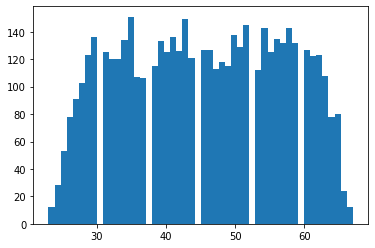

In [274]:
plt.hist(mydata['Age'], bins=50) # Histogram on Age 

**Age is well distributed, there are empty bins in between**

(array([  4.,  15.,  33.,  66.,  74.,  85., 129., 113., 146., 119., 121.,
        119.,   0., 147., 118., 116., 102., 117., 127., 119., 127., 125.,
        137., 135.,   0., 148., 113., 124., 144., 131., 142., 134., 125.,
        138., 124., 126., 104.,   0., 154., 117., 125., 143., 114., 116.,
         88.,  85.,  57.,  43.,   8.,   3.]),
 array([-3.  , -2.08, -1.16, -0.24,  0.68,  1.6 ,  2.52,  3.44,  4.36,
         5.28,  6.2 ,  7.12,  8.04,  8.96,  9.88, 10.8 , 11.72, 12.64,
        13.56, 14.48, 15.4 , 16.32, 17.24, 18.16, 19.08, 20.  , 20.92,
        21.84, 22.76, 23.68, 24.6 , 25.52, 26.44, 27.36, 28.28, 29.2 ,
        30.12, 31.04, 31.96, 32.88, 33.8 , 34.72, 35.64, 36.56, 37.48,
        38.4 , 39.32, 40.24, 41.16, 42.08, 43.  ]),
 <a list of 50 Patch objects>)

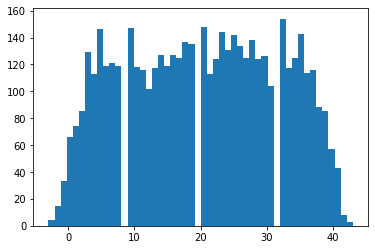

In [275]:
plt.hist(mydata['Experience'], bins=50) # Histogram on Experience

**Experience is well distributed from 0 to 40, there are empty bins in between and there is negative values(needs corrrection)**

(array([129.,  96., 152., 295., 130., 227., 202., 318., 224., 182., 217.,
        108., 270.,  95., 177., 136., 253., 263.,  98., 129.,  53.,  92.,
         40.,  75., 117.,  54.,  74.,  47.,  94.,  38.,  77.,  54.,  42.,
         51.,  44.,  47.,  24.,  47.,  34.,  45.,  54.,  12.,  36.,  26.,
         13.,   7.,   0.,   0.,   1.,   1.]),
 array([  8.  ,  12.32,  16.64,  20.96,  25.28,  29.6 ,  33.92,  38.24,
         42.56,  46.88,  51.2 ,  55.52,  59.84,  64.16,  68.48,  72.8 ,
         77.12,  81.44,  85.76,  90.08,  94.4 ,  98.72, 103.04, 107.36,
        111.68, 116.  , 120.32, 124.64, 128.96, 133.28, 137.6 , 141.92,
        146.24, 150.56, 154.88, 159.2 , 163.52, 167.84, 172.16, 176.48,
        180.8 , 185.12, 189.44, 193.76, 198.08, 202.4 , 206.72, 211.04,
        215.36, 219.68, 224.  ]),
 <a list of 50 Patch objects>)

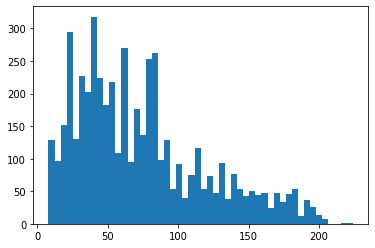

In [276]:
plt.hist(mydata['Income'], bins=50) # Histogram on Income

**Income is right skewed with majority less than 100$**

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.038e+03, 1.409e+03,
        1.633e+03, 9.190e+02]),
 array([ 9307.  , 11053.88, 12800.76, 14547.64, 16294.52, 18041.4 ,
        19788.28, 21535.16, 23282.04, 25028.92, 26775.8 , 28522.68,
        30269.56, 32016.44, 33763.32, 35510.2 , 37257.08, 39003.96,
        40750.84, 42497.72, 44244.6 , 45991.48, 47738.36, 49485.24,
        51232.12, 52979.  , 54725.88, 56472.76, 58219.64, 59966.52,
        61713.4 , 63460.28, 65207.16

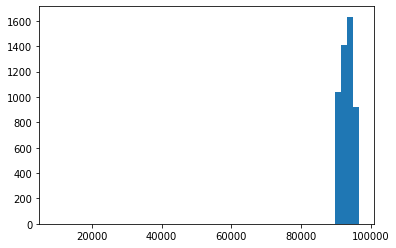

In [277]:
plt.hist(mydata['ZIP Code'], bins=50) # Histogram on Zip Code

**Zip codes are ranged above 85000 and below 100000, the outlier predicted earlier not seen here because bins kept at 50**

(array([1472.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0., 1296.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0., 1010.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0., 1222.]),
 array([1.  , 1.06, 1.12, 1.18, 1.24, 1.3 , 1.36, 1.42, 1.48, 1.54, 1.6 ,
        1.66, 1.72, 1.78, 1.84, 1.9 , 1.96, 2.02, 2.08, 2.14, 2.2 , 2.26,
        2.32, 2.38, 2.44, 2.5 , 2.56, 2.62, 2.68, 2.74, 2.8 , 2.86, 2.92,
        2.98, 3.04, 3.1 , 3.16, 3.22, 3.28, 3.34, 3.4 , 3.46, 3.52, 3.58,
        3.64, 3.7 , 3.76, 3.82, 3.88, 3.94, 4.  ]),
 <a list of 50 Patch objects>)

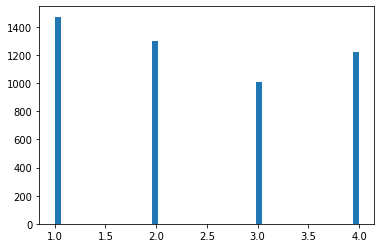

In [278]:
plt.hist(mydata['Family'], bins=50) # Histogram on Family

**Well distributed family sizes**

(array([289., 445., 460., 196., 293., 381., 273., 178., 286., 258., 288.,
        298., 107., 292.,  54.,  73., 108.,  15.,  96.,  27.,  55.,  48.,
         60.,  34.,  22.,  24.,  21.,  29.,  18.,   5.,  40.,  25.,  25.,
         28.,  14.,  14.,  23.,  34.,   9.,   4.,  23.,   2.,   2.,   8.,
         10.,   2.,   1.,   0.,   0.,   3.]),
 array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ,
         2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,  3.8,  4. ,  4.2,
         4.4,  4.6,  4.8,  5. ,  5.2,  5.4,  5.6,  5.8,  6. ,  6.2,  6.4,
         6.6,  6.8,  7. ,  7.2,  7.4,  7.6,  7.8,  8. ,  8.2,  8.4,  8.6,
         8.8,  9. ,  9.2,  9.4,  9.6,  9.8, 10. ]),
 <a list of 50 Patch objects>)

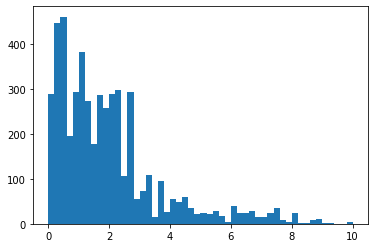

In [279]:
plt.hist(mydata['CCAvg'], bins=50) # Histogram on CCAvg 

**Distribution upto 3 is highest, right skewed, outliers as suspected from earlier is seen**

(array([2096.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0., 1403.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0., 1501.]),
 array([1.  , 1.04, 1.08, 1.12, 1.16, 1.2 , 1.24, 1.28, 1.32, 1.36, 1.4 ,
        1.44, 1.48, 1.52, 1.56, 1.6 , 1.64, 1.68, 1.72, 1.76, 1.8 , 1.84,
        1.88, 1.92, 1.96, 2.  , 2.04, 2.08, 2.12, 2.16, 2.2 , 2.24, 2.28,
        2.32, 2.36, 2.4 , 2.44, 2.48, 2.52, 2.56, 2.6 , 2.64, 2.68, 2.72,
        2.76, 2.8 , 2.84, 2.88, 2.92, 2.96, 3.  ]),
 <a list of 50 Patch objects>)

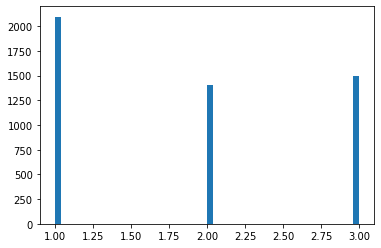

In [282]:
plt.hist(mydata['Education'], bins=50) # Histogram on Education 

**Well distributed data among the three values**

(array([3.462e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+01,
        1.280e+02, 1.480e+02, 1.450e+02, 1.250e+02, 9.900e+01, 1.010e+02,
        9.100e+01, 6.600e+01, 7.100e+01, 5.400e+01, 5.100e+01, 5.900e+01,
        5.000e+01, 4.000e+01, 2.800e+01, 2.500e+01, 1.900e+01, 2.700e+01,
        2.800e+01, 2.500e+01, 1.400e+01, 1.100e+01, 1.500e+01, 8.000e+00,
        8.000e+00, 1.400e+01, 7.000e+00, 1.100e+01, 6.000e+00, 6.000e+00,
        5.000e+00, 4.000e+00, 2.000e+00, 3.000e+00, 2.000e+00, 2.000e+00,
        2.000e+00, 3.000e+00, 5.000e+00, 3.000e+00, 3.000e+00, 1.000e+00,
        2.000e+00, 1.000e+00]),
 array([  0. ,  12.7,  25.4,  38.1,  50.8,  63.5,  76.2,  88.9, 101.6,
        114.3, 127. , 139.7, 152.4, 165.1, 177.8, 190.5, 203.2, 215.9,
        228.6, 241.3, 254. , 266.7, 279.4, 292.1, 304.8, 317.5, 330.2,
        342.9, 355.6, 368.3, 381. , 393.7, 406.4, 419.1, 431.8, 444.5,
        457.2, 469.9, 482.6, 495.3, 508. , 520.7, 533.4, 546.1, 558.8,
        571.5, 584.2,

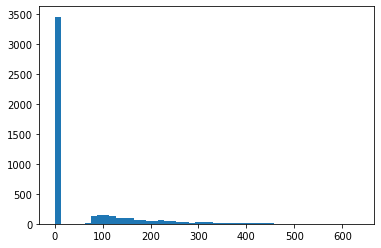

In [283]:
plt.hist(mydata['Mortgage'], bins=50) # Histogram on Mortgage 

**Mortage of 0 is the highest data point, distribution of 80 to 200 is even, has a long tail - signs of outlier**

(array([4520.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,  480.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <a list of 50 Patch objects>)

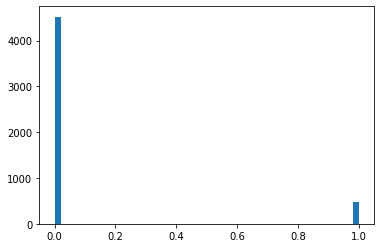

In [284]:
plt.hist(mydata['Personal Loan'], bins=50) # Histogram on Personal Loan

**This is our target attribute - as provided in data only around 9% has accepted loan, data is not distributed well clearly**

(array([4478.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,  522.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <a list of 50 Patch objects>)

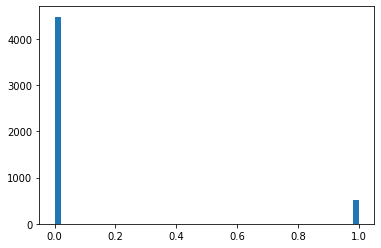

In [285]:
plt.hist(mydata['Securities Account'], bins=50) # Histogram on Securities Account 

**Another Categorical variable, data is not distributed well clearly**

(array([4698.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,  302.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <a list of 50 Patch objects>)

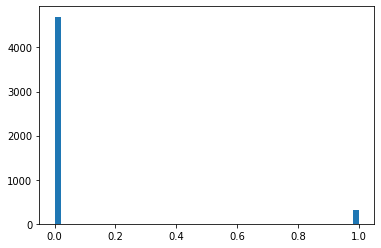

In [286]:
plt.hist(mydata['CD Account'], bins=50) # Histogram on CD Account' 

**Another Categorical variable, data is not distributed well clearly**

(array([2016.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0., 2984.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <a list of 50 Patch objects>)

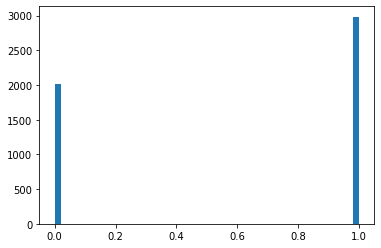

In [287]:
plt.hist(mydata['Online'], bins=50) # Histogram on Online 

**Another Categorical variable, data is distributed well clearly**

(array([3530.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0., 1470.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <a list of 50 Patch objects>)

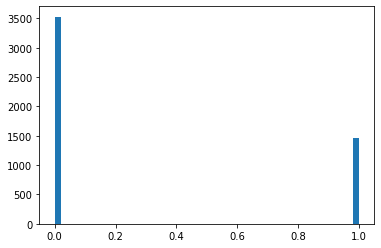

In [288]:
plt.hist(mydata['CreditCard'], bins=50) # Histogram on CreditCard 

**Another Categorical variable, data is partially distributed well**

**The arrays above the graph gives as the counts at each data point**

## Multivariate Analysis - Same Distribution as above with all columns on single cell

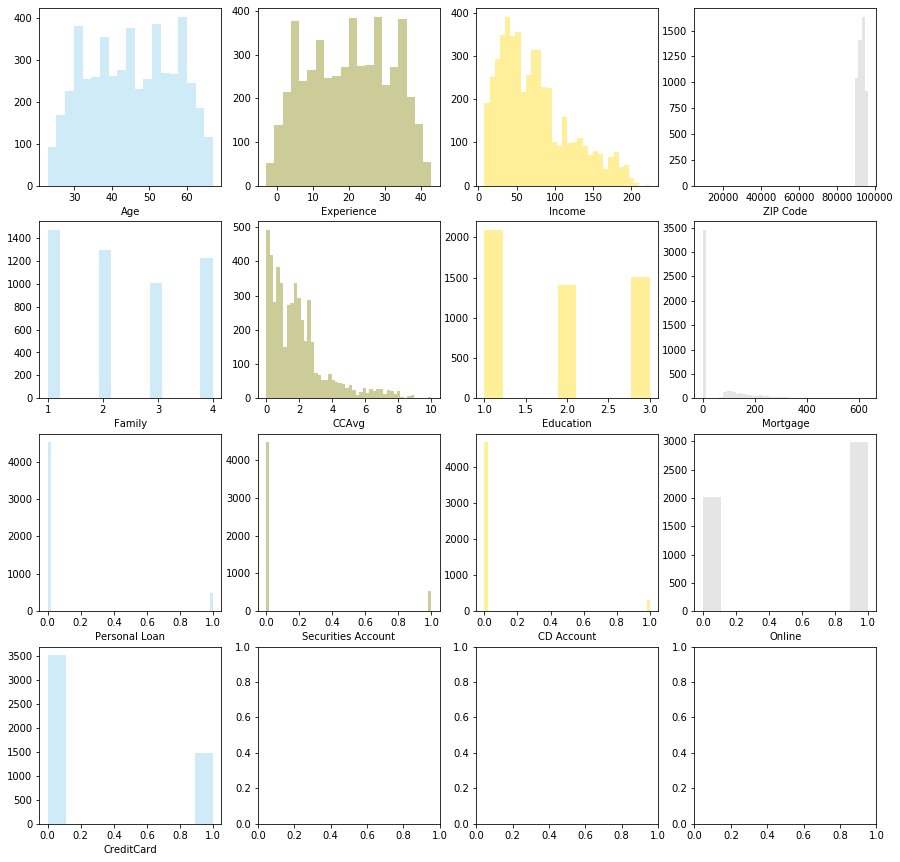

In [289]:
# One plotting for all columns

#mydata[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2))


f, axes = plt.subplots(4, 4, figsize=(15, 15))
sns.distplot( mydata["Age"] , hist=True, kde=False, color="skyblue", ax=axes[0, 0])
sns.distplot( mydata["Experience"] , hist=True, kde=False, color="olive", ax=axes[0, 1])
sns.distplot( mydata["Income"] , hist=True, kde=False, color="gold", ax=axes[0, 2])
sns.distplot( mydata["ZIP Code"] , hist=True, kde=False, color="silver", ax=axes[0, 3])
sns.distplot( mydata["Family"] , hist=True, kde=False, color="skyblue", ax=axes[1, 0])
sns.distplot( mydata["CCAvg"] , hist=True, kde=False, color="olive", ax=axes[1, 1])
sns.distplot( mydata["Education"] , hist=True, kde=False, color="gold", ax=axes[1, 2])
sns.distplot( mydata["Mortgage"] , hist=True, kde=False, color="silver", ax=axes[1, 3])
sns.distplot( mydata["Personal Loan"] , hist=True, kde=False, color="skyblue", ax=axes[2, 0])
sns.distplot( mydata["Securities Account"] , hist=True, kde=False, color="olive", ax=axes[2, 1])
sns.distplot( mydata["CD Account"] , hist=True, kde=False, color="gold", ax=axes[2, 2])
sns.distplot( mydata["Online"] , hist=True, kde=False, color="silver", ax=axes[2, 3])
sns.distplot( mydata["CreditCard"] , hist=True, kde=False, color="skyblue", ax=axes[3, 0])


**Similar inferences can be made from earlier univariate analysis**

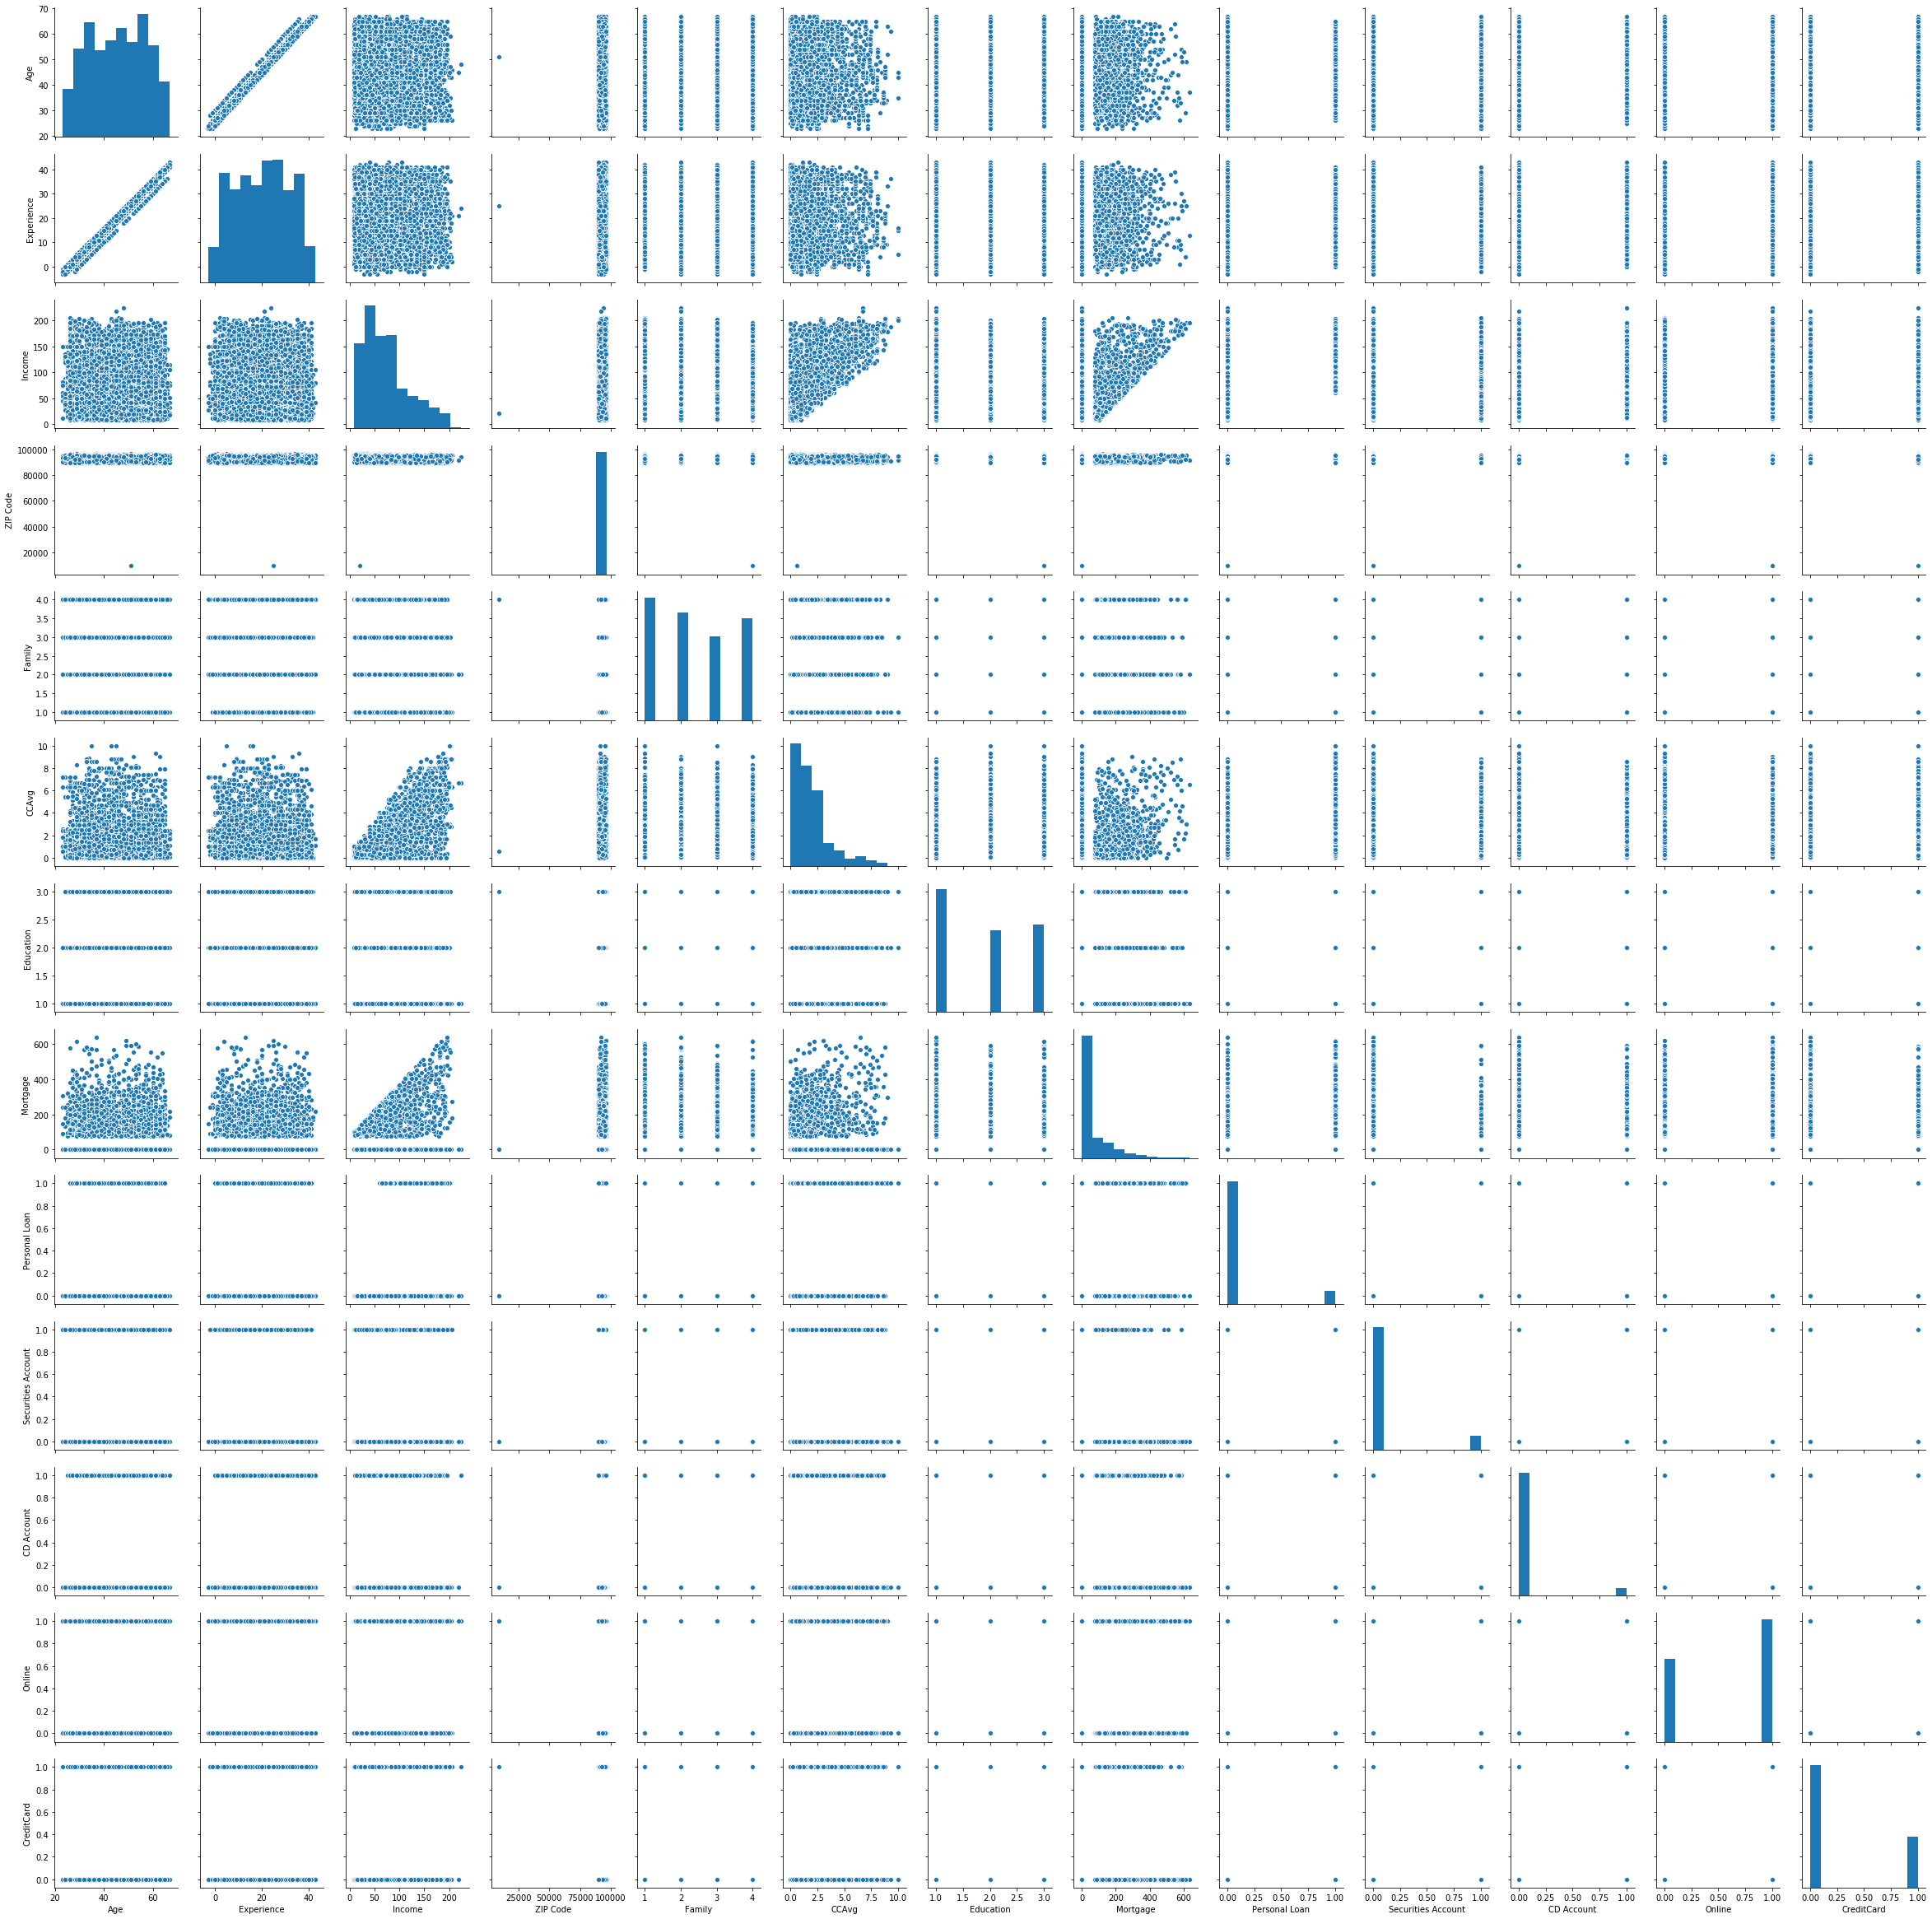

In [290]:
sns.pairplot(mydata)

**Data spread can be noticed here with + or - relationships**

### Further Analysis on each attribute

In [291]:
mydata.cov() # Prints the covariance of each attribute against every other attribute

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,131.404166,130.698543,-29.164822,-7.106319e+02,-0.610664,-1.041997,0.397949,-14.619518,-0.026092,-0.001529,0.021965,0.077058,0.040118
Experience,130.698543,131.513962,-24.587099,-6.965541e+02,-0.691802,-1.003637,0.126673,-12.342843,-0.025047,-0.004321,0.028288,0.078190,0.046857
Income,-29.164822,-24.587099,2119.104235,-1.602857e+03,-8.320957,51.970200,-7.250120,968.321693,6.814640,-0.036834,1.861611,0.320822,-0.050025
ZIP Code,-710.631942,-696.554125,-1602.857394,4.502257e+06,28.681947,-15.058132,-30.966736,1593.492802,0.067125,3.052497,10.096438,17.685947,7.436005
Family,-0.610664,-0.691802,-8.320957,2.868195e+01,1.317130,-0.219174,0.062584,-2.386602,0.020750,0.007017,0.003858,0.005830,0.006060
CCAvg,-1.041997,-1.003637,51.970200,-1.505813e+01,-0.219174,3.054312,-0.199803,19.536778,0.188910,0.008063,0.056850,-0.003096,-0.005327
Education,0.397949,0.126673,-7.250120,-3.096674e+01,0.062584,-0.199803,0.705380,-2.847012,0.033831,-0.002777,0.002788,-0.006182,-0.004215
Mortgage,-14.619518,-12.342843,968.321693,1.593493e+03,-2.386602,19.536778,-2.847012,10345.697538,4.258167,-0.168308,2.164305,-0.299144,-0.335114
Personal Loan,-0.026092,-0.025047,6.814640,6.712543e-02,0.020750,0.188910,0.033831,4.258167,0.086801,0.001978,0.022206,0.000907,0.000376
Securities Account,-0.001529,-0.004321,-0.036834,3.052497e+00,0.007017,0.008063,-0.002777,-0.168308,0.001978,0.093519,0.023099,0.001894,-0.002094


**Co-variance does not give us scaled relationship, we require correlation**

In [292]:
mydata.corr()  # prints the correlation coefficient between every pair of attributes

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.001232,-0.002616,0.004704,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028


**There is positive relationship between Age vs Experience, Income vs CCAvg and the rest has negligible, negative correlations**

**Personal Loan - target variable is most dependent on 'Income', 'CCAvg', 'CD Account'**

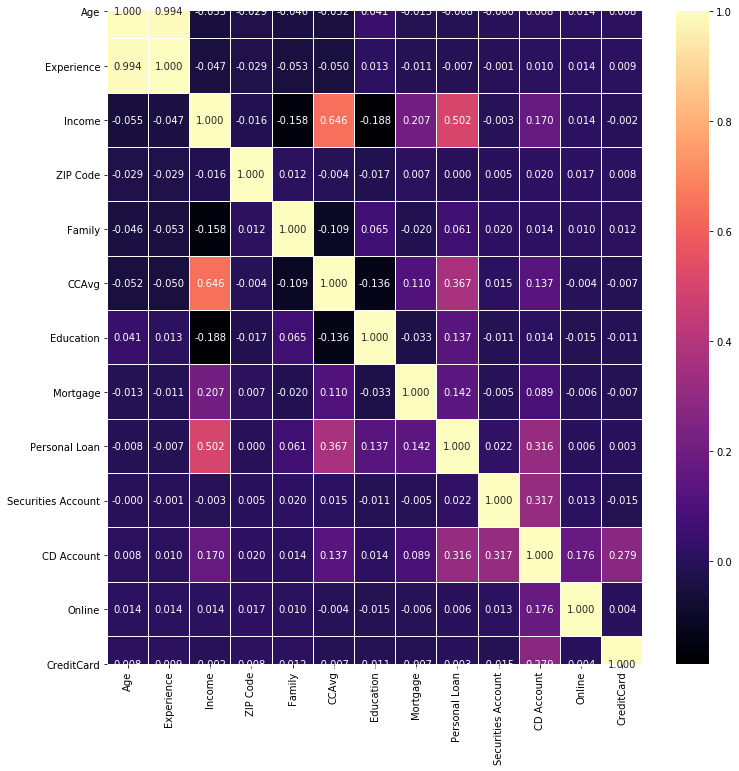

In [293]:
# Visual Representation of correlations

fig,ax = plt.subplots(figsize=(12, 12))   
sns.heatmap(mydata.corr(), ax=ax, annot=True, linewidths=0.03, fmt= '.3f',cmap="magma") # the color intensity is based on 
plt.show()

**Same correlation can be viewed better in above visual representation and similar inferences can be made**

**Since Age and Experience has high correlation we can drop any one column and reduce the complexity on modeling.
Experience had negative values so we can either drop the column or reomve or replace with any logic**

In [294]:
mydata.skew()   # to measure the skeweness of every attribute

Age                   -0.029341
Experience            -0.026325
Income                 0.841339
ZIP Code             -12.500221
Family                 0.155221
CCAvg                  1.598443
Education              0.227093
Mortgage               2.104002
Personal Loan          2.743607
Securities Account     2.588268
CD Account             3.691714
Online                -0.394785
CreditCard             0.904589
dtype: float64

**Similar outlier predictions can be inferenced from here as well with higher + and - values**

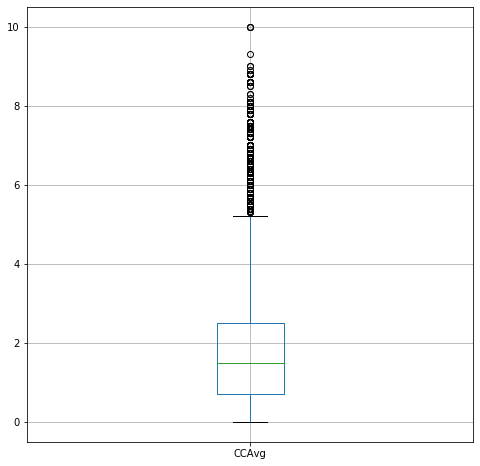

In [295]:
# Create boxplot for column="CCAvg"
mydata.boxplot(column="CCAvg",return_type='axes',figsize=(8,8))


**Outlier predictions are true and is validated using box plots - measure of skewness is used to validate outliers**

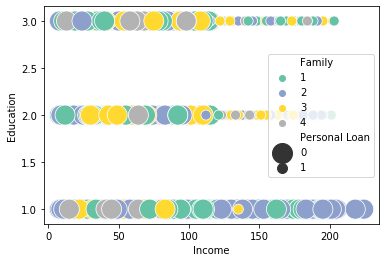

In [296]:
sns.scatterplot(mydata['Income'], mydata['Education'], hue=mydata['Family'], palette='Set2', size=mydata['Personal Loan'], sizes=(100, 400)) 

**Relationships of various variables can be inferenced - Target variable dependence on education is seen here**

## Logistic, K-NN and Naïve Bayes - Modeling

In [297]:
n_true = len(mydata.loc[mydata['Personal Loan'] == True])
n_false = len(mydata.loc[mydata['Personal Loan'] == False])
print("Number of true cases: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of false cases: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

Number of true cases: 480 (9.60%)
Number of false cases: 4520 (90.40%)


So we have 9.6% people in current data set who have accepted personal loan and rest of 90.4% doesn't have. 

Its not a good distribution of True/False cases of Personal Loan in data.

In [298]:
#Splitting data into 70:30

X = mydata.drop('Personal Loan',axis=1)     # Predictor feature columns (8 X m)
Y = mydata['Personal Loan']   # Predicted class (1=True, 0=False) (1 X m)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
# 1 is just any random seed number

x_train.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
1334,47,22,35,94304,2,1.3,1,0,0,0,1,0
4768,38,14,39,93118,1,2.0,2,0,0,0,1,0
65,59,35,131,91360,1,3.8,1,0,0,0,1,1
177,29,3,65,94132,4,1.8,2,244,0,0,0,0
4489,39,13,21,95518,3,0.2,2,0,0,0,1,0


### Logistic Regression

In [299]:
# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0        1         2         3         4         5         6  \
0 -0.000528 -0.00201  0.036089 -0.000066  0.015165  0.009454  0.016447   

          7         8         9        10        11  intercept  
0  0.000833  0.000534  0.004681 -0.000177 -0.000067  -0.000106  


In [300]:
model_score = model.score(x_test, y_test)
print(model_score)

0.9073333333333333


In [301]:
cnf_matrix = metrics.confusion_matrix(y_test, y_predict)
cnf_matrix

array([[1318,   33],
       [ 106,   43]], dtype=int64)

In [302]:
print("Accuracy:",metrics.accuracy_score(y_test, y_predict))
print("Precision:",metrics.precision_score(y_test, y_predict))
print("Recall:",metrics.recall_score(y_test, y_predict))

Accuracy: 0.9073333333333333
Precision: 0.5657894736842105
Recall: 0.28859060402684567


**Precision and Recall are low and tell us that our model is not accurate**

**Precision: Precision is about being precise, i.e., how accurate your model is. In other words, you can say, when a model makes a prediction, how often it is correct.
Recall: If customers can potentially take personal loan in the test set and our logistic regression model can identify it 28% of the time.**

**Standard scaler must be used to standardise the various columns**

In [303]:
#Use Standard scale on all columns and then we will re-predict

sc_x = StandardScaler() 
x_train = sc_x.fit_transform(x_train)  
x_test = sc_x.transform(x_test) 
  
print (x_train[0:5, :])

[[ 0.13597665  0.15613728 -0.83705838  0.50880446 -0.34495524 -0.3657083
  -1.05571315 -0.55770661 -0.34173625 -0.25835623  0.83164805 -0.650648  ]
 [-0.64621189 -0.53857809 -0.75040637 -0.01612016 -1.21794393  0.03787597
   0.13545256 -0.55770661 -0.34173625 -0.25835623  0.83164805 -0.650648  ]
 [ 1.1788947   1.28504976  1.24258976 -0.79421247 -1.21794393  1.0756641
  -1.05571315 -0.55770661 -0.34173625 -0.25835623  0.83164805  1.53692933]
 [-1.42840043 -1.49381173 -0.18716833  0.43267712  1.40102213 -0.07743382
   0.13545256  1.86992266 -0.34173625 -0.25835623 -1.20243173 -0.650648  ]
 [-0.55930205 -0.62541751 -1.1403404   1.04612191  0.52803344 -0.99991216
   0.13545256 -0.55770661 -0.34173625 -0.25835623  0.83164805 -0.650648  ]]


In [304]:
classifier = LogisticRegression(random_state = 0) 
classifier.fit(x_train, y_train) 
y_predict = classifier.predict(x_test) 

In [305]:
model_score = model.score(x_test, y_test)
print(model_score)

0.6466666666666666


In [306]:
cnf_matrix = metrics.confusion_matrix(y_test, y_predict)
cnf_matrix

array([[1335,   16],
       [  62,   87]], dtype=int64)

**Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions. 
In the output, 1335 and 87 are actual predictions, and 16 and 62 are incorrect predictions.**

In [307]:
print("Accuracy:",metrics.accuracy_score(y_test, y_predict))
print("Precision:",metrics.precision_score(y_test, y_predict))
print("Recall:",metrics.recall_score(y_test, y_predict))

Accuracy: 0.948
Precision: 0.8446601941747572
Recall: 0.5838926174496645


**After Standardization scores have been improved**

### Naive Bayes

In [308]:
#Splitting data into 70:30

# Here we drop Age as well because it has high correlation with Experience(''.99')
X = mydata.drop(['Personal Loan','Age'],axis=1)     # Predictor feature columns (8 X m)
Y = mydata['Personal Loan']   # Predicted class (1=True, 0=False) (1 X m)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
# 1 is just any random seed number

x_train.head()

,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
1334,22,35,94304,2,1.3,1,0,0,0,1,0
4768,14,39,93118,1,2.0,2,0,0,0,1,0
65,35,131,91360,1,3.8,1,0,0,0,1,1
177,3,65,94132,4,1.8,2,244,0,0,0,0
4489,13,21,95518,3,0.2,2,0,0,0,1,0


In [309]:
# create the model
NB_model = GaussianNB()

NB_model.fit(x_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

**Performance of our model with training data**

In [310]:
train_predict = NB_model.predict(x_train)

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, train_predict)))
print()

Model Accuracy: 0.8949



**Performance of our model with test data**

In [311]:
test_predict = NB_model.predict(x_test)

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, test_predict)))
print()

Model Accuracy: 0.8833



**Confusion Matrix and Classification Report**

In [312]:
cnf_matrix = metrics.confusion_matrix(y_test, y_predict)
cnf_matrix

array([[1335,   16],
       [  62,   87]], dtype=int64)

In [313]:
print("Classification Report")
print(metrics.classification_report(y_test, test_predict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.43      0.56      0.49       149
           0       0.95      0.92      0.93      1351

    accuracy                           0.88      1500
   macro avg       0.69      0.74      0.71      1500
weighted avg       0.90      0.88      0.89      1500



**Naive Bayes requires continous features to have normal distribution, but our data is not in normal distribution for features such as CCAvg and Income. We have already established both these columns has high correlation to Personal Loan ie '.36' and '.50' respectively**

#### Lets try standardization with NB

In [314]:
#Use Standard scale on all columns and then we will re-predict

sc_x = StandardScaler() 
x_train = sc_x.fit_transform(x_train)  
x_test = sc_x.transform(x_test) 
  
print (x_train[0:5, :])

[[ 0.15613728 -0.83705838  0.50880446 -0.34495524 -0.3657083  -1.05571315
  -0.55770661 -0.34173625 -0.25835623  0.83164805 -0.650648  ]
 [-0.53857809 -0.75040637 -0.01612016 -1.21794393  0.03787597  0.13545256
  -0.55770661 -0.34173625 -0.25835623  0.83164805 -0.650648  ]
 [ 1.28504976  1.24258976 -0.79421247 -1.21794393  1.0756641  -1.05571315
  -0.55770661 -0.34173625 -0.25835623  0.83164805  1.53692933]
 [-1.49381173 -0.18716833  0.43267712  1.40102213 -0.07743382  0.13545256
   1.86992266 -0.34173625 -0.25835623 -1.20243173 -0.650648  ]
 [-0.62541751 -1.1403404   1.04612191  0.52803344 -0.99991216  0.13545256
  -0.55770661 -0.34173625 -0.25835623  0.83164805 -0.650648  ]]


In [315]:
NB_model.fit(x_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [316]:
train_predict = NB_model.predict(x_train)

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, train_predict)))
print()

Model Accuracy: 0.8897



In [317]:
test_predict = NB_model.predict(x_test)

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, test_predict)))
print()

Model Accuracy: 0.8747



In [318]:
cnf_matrix = metrics.confusion_matrix(y_test, y_predict)
cnf_matrix

array([[1335,   16],
       [  62,   87]], dtype=int64)

In [319]:
print("Classification Report")
print(metrics.classification_report(y_test, test_predict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.40      0.55      0.47       149
           0       0.95      0.91      0.93      1351

    accuracy                           0.87      1500
   macro avg       0.68      0.73      0.70      1500
weighted avg       0.89      0.87      0.88      1500



**Differences are not much before standardization and after standardization**

### KNN

In [320]:
#Splitting data into 70:30

# Here we drop Age as well because it has high correlation with Experience(''.99')
X = mydata.drop(['Personal Loan','Age'],axis=1)     # Predictor feature columns (8 X m)
Y = mydata['Personal Loan']   # Predicted class (1=True, 0=False) (1 X m)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
# 1 is just any random seed number

x_train.head()

,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
1334,22,35,94304,2,1.3,1,0,0,0,1,0
4768,14,39,93118,1,2.0,2,0,0,0,1,0
65,35,131,91360,1,3.8,1,0,0,0,1,1
177,3,65,94132,4,1.8,2,244,0,0,0,0
4489,13,21,95518,3,0.2,2,0,0,0,1,0


In [321]:
NNH = KNeighborsClassifier(n_neighbors= 7 , weights = 'distance' )

In [322]:
# Call Nearest Neighbour algorithm

NNH.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='distance')

In [323]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

y_predict = NNH.predict(x_test)
NNH.score(x_test, y_test)

0.898

In [324]:
cnf_matrix = metrics.confusion_matrix(y_test, y_predict)
cnf_matrix

array([[1315,   36],
       [ 117,   32]], dtype=int64)

**Have tried with varying neigbour values upto 8, accuracy increases but affects the confusion matrix negatively**

### Will try after standardize using Z score

In [325]:
#Splitting data into 70:30

# Here we drop Age as well because it has high correlation with Experience(''.99')
X = mydata.drop(['Personal Loan','Age'],axis=1)     # Predictor feature columns (8 X m)
Y = mydata['Personal Loan']   # Predicted class (1=True, 0=False) (1 X m)

In [326]:
# convert the features into z scores as we do not know what units / scales were used and store them in new dataframe
# It is always adviced to scale numeric attributes in models that calculate distances.

XScaled  = X.apply(zscore)  # convert all attributes to Z scale 

XScaled.describe()

,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
count,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03
mean,-1.693312e-16,1.939449e-16,1.513445e-15,7.850609e-16,-2.078338e-17,-6.315837e-16,2.810197e-16,5.092149e-16,4.426903e-16,2.986500e-16,-3.697931e-16
std,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00
min,-2.014911e+00,-1.428969e+00,-3.951919e+01,-1.216855e+00,-1.108987e+00,-1.049078e+00,-5.555239e-01,-3.414233e-01,-2.535403e-01,-1.216618e+00,-6.453143e-01
25%,-8.812043e-01,-7.554825e-01,-5.851619e-01,-1.216855e+00,-7.084116e-01,-1.049078e+00,-5.555239e-01,-3.414233e-01,-2.535403e-01,-1.216618e+00,-6.453143e-01
50%,-9.121982e-03,-2.123482e-01,1.340930e-01,-3.454321e-01,-2.506106e-01,1.417029e-01,-5.555239e-01,-3.414233e-01,-2.535403e-01,8.219509e-01,-6.453143e-01
75%,8.629604e-01,5.263146e-01,6.860245e-01,5.259909e-01,3.216407e-01,1.332484e+00,4.375576e-01,-3.414233e-01,-2.535403e-01,8.219509e-01,1.549632e+00
max,1.996667e+00,3.263712e+00,1.648959e+00,1.397414e+00,4.613525e+00,1.332484e+00,5.688108e+00,2.928915e+00,3.944146e+00,8.219509e-01,1.549632e+00


In [327]:
# Split X and y into training and test set in 75:25 ratio

X_train, X_test, y_train, y_test = train_test_split(XScaled, Y, test_size=0.30, random_state=1)

In [328]:
NNH = KNeighborsClassifier(n_neighbors= 7 , weights = 'distance' )
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

In [329]:
# Call Nearest Neighbour algorithm

NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='distance')

In [330]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

predicted_labels = NNH.predict(X_test)
NNH.score(X_test, y_test)

0.9513333333333334

In [331]:
cnf_matrix = metrics.confusion_matrix(y_test, y_predict)
cnf_matrix

array([[1315,   36],
       [ 117,   32]], dtype=int64)

## Conclusion

We have used three algorithims: Logistic Regression, Naive Bayes and KNN. 
Of which KNN has given the highest accuracy of 0.95

Others have given as below:
Logistic before standardization: .90
Logistic after standarization: .94

Naive Bayes before standardization: .88
Naive Bayes after standardization: .87

**KNN can be used to predict the likelihood of a liability customer buying personal loans.**